In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
letter_dict = {"shape": (5, 5), "d_value": (-1, 1), "letters":
               {"D": {"indices": np.array([[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4], [0, 1, 2, 3, 1, 4, 1, 4, 1, 4, 1, 2, 3]])},
               "C": {"indices": np.array([[0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4], [1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4]])},
               "J": {"indices": np.array([[0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 4, 4], [0, 1, 2, 3, 4, 3, 3, 0, 3, 0, 1, 2]])},
               "M": {"indices": np.array([[0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4], [0, 4, 0, 1, 3, 4, 0, 2, 4, 0, 4, 0, 4]])}}}

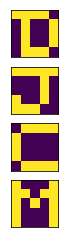

In [3]:
# create character as 5 by 5 matrix based on given X,Y indices
def char_creator(dim, x_indices, y_indices):
    empty = np.full(dim, -1)
    empty[x_indices, y_indices] = 1
    return(empty)

def memory_initializer(l_dict):
    # letters
    letters = list(l_dict["letters"].keys())
    # number of letters
    num_letters = len(letters)
    # create an empty list to append letter arrays
    arr_collection = []
    # initialize an empty graph to present letters in the memory
    fig, ax = plt.subplots(nrows=num_letters,ncols=1)
    
    # insert letters
    for i in range(num_letters):
        # create letters
        row_index = l_dict["letters"][letters[i]]["indices"][0]
        col_index = l_dict["letters"][letters[i]]["indices"][1]
        arr_2d = char_creator(l_dict["shape"], row_index, col_index)
        # visualize letters
        ax[i].imshow(arr_2d)
        ax[i].tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        arr_1d = arr_2d.flatten()
        arr_collection.append(arr_1d)
    # show letters
    plt.show()
    # return a letter matrix
    out_l_matrix = np.array(arr_collection).reshape(num_letters, np.square(l_dict["shape"][0]))
    return(out_l_matrix)
arr_matrix = memory_initializer(letter_dict)

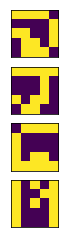

In [4]:
def mutator(in_char, mutants_num):
    # claim system-wise variables
    tmp = np.copy(in_char)
    num_letters = tmp.shape[0]
    num_flattend = tmp.shape[1]
    dim = letter_dict["shape"]
    # create an empty graph to visualize mutated letters
    fig, ax = plt.subplots(nrows=num_letters,ncols=1)
    # mutate letters
    for i in range(num_letters):
        mut_ix = np.random.choice(num_flattend, mutants_num)
        tmp[i, mut_ix] = -tmp[i, mut_ix]
        ax[i].imshow(tmp[i].reshape(dim))
        ax[i].tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
    return(tmp)
mutated_letters = mutator(arr_matrix, 3)

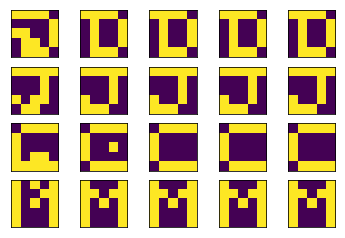

In [5]:
def Hopfield_NN_learner(matrix_in_memo, matrix_mutated, iteration):
    # initialize system-wise variables
    dim = letter_dict["shape"]
    num_letters = matrix_in_memo.shape[0]
    num_flattened = matrix_in_memo.shape[1]
    
    # initialize an empty graph
    fig, ax = plt.subplots(nrows=num_letters, ncols=iteration)
    
    # initialize the matrix originally stored in the memory
    x = np.copy(matrix_in_memo)
    # compute the matrix of connectivity weights
    conn_weights = np.dot(x.T, x)
    # convert the diagonal to 0
    np.fill_diagonal(conn_weights, 0)
    
    # letters restoration
    for i in range(iteration):
        for row in range(num_letters):
            # visualize letter from eazh round
            ax[row, i].imshow(matrix_mutated[row].reshape(dim))
            ax[row, i].tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
            # feed the mutated array as training inputs to compute activations
            a = np.dot(conn_weights, matrix_mutated[row])
            # neuron activity
            matrix_mutated[[row], a > 0] = 1
            matrix_mutated[[row], a < 0] = -1
    plt.show()
predicted = Hopfield_NN_learner(arr_matrix, mutated_letters, 5)